In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
data = pd.read_csv("E:\Machine Learninng\Algorithms\RandomForest\practice_dataset.csv")
data

,age,income,education_years,hours_per_week,experience_years,credit_score,owns_house,owns_car,num_dependents,city_tier,loan_approved
0,56,21920,5,52,26,568,1,0,3,3,0
1,69,126121,5,72,24,663,0,0,1,3,1
2,46,97219,13,49,31,399,1,1,4,3,0
3,32,96872,10,23,18,514,0,0,5,1,0
4,60,101132,7,68,23,396,1,1,4,3,1
...,...,...,...,...,...,...,...,...,...,...,...
4995,24,80726,4,50,31,773,0,0,1,2,0
4996,66,112906,2,53,32,743,1,0,1,3,1
4997,26,36532,2,69,3,711,0,1,5,1,0
4998,53,142689,18,46,29,545,1,0,2,3,1


In [5]:
df = data.copy()

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   age               5000 non-null   int64
 1   income            5000 non-null   int64
 2   education_years   5000 non-null   int64
 3   hours_per_week    5000 non-null   int64
 4   experience_years  5000 non-null   int64
 5   credit_score      5000 non-null   int64
 6   owns_house        5000 non-null   int64
 7   owns_car          5000 non-null   int64
 8   num_dependents    5000 non-null   int64
 9   city_tier         5000 non-null   int64
 10  loan_approved     5000 non-null   int64
dtypes: int64(11)
memory usage: 429.8 KB


In [7]:
df.describe()

,age,income,education_years,hours_per_week,experience_years,credit_score,owns_house,owns_car,num_dependents,city_tier,loan_approved
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,43.584600,84632.847400,9.575200,41.876800,19.461200,577.543000,0.491200,0.491800,2.518200,2.002800,0.400000
std,14.919094,37591.056659,5.742625,21.601411,11.559862,159.004256,0.499973,0.499983,1.719727,0.808284,0.489947
min,18.000000,20060.000000,0.000000,5.000000,0.000000,300.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,31.000000,51618.250000,5.000000,23.000000,9.000000,438.000000,0.000000,0.000000,1.000000,1.000000,0.000000
50%,43.000000,85510.500000,10.000000,42.000000,19.000000,580.000000,0.000000,0.000000,3.000000,2.000000,0.000000
75%,56.000000,117301.000000,15.000000,60.000000,30.000000,713.000000,1.000000,1.000000,4.000000,3.000000,1.000000
max,69.000000,149974.000000,19.000000,79.000000,39.000000,849.000000,1.000000,1.000000,5.000000,3.000000,1.000000


In [8]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]


<Axes: >

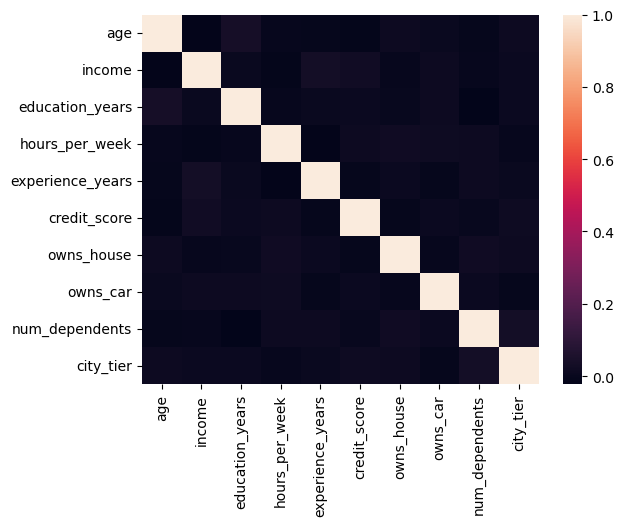

In [9]:
import seaborn as sns
sns.heatmap(X.corr())

In [10]:
from sklearn.model_selection import train_test_split,cross_val_score,KFold
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=2,test_size=0.2)

In [11]:
X_test.shape

(1000, 10)

In [12]:
from sklearn.tree import DecisionTreeClassifier,plot_tree
model = DecisionTreeClassifier(max_depth = 4)
model.fit(X_train,y_train)


,criterion,'gini'
,splitter,'best'
,max_depth,4
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [13]:
y_pred = model.predict(X_test)

In [14]:
from sklearn.metrics import accuracy_score,precision_score
print("Accuracy Score : ",accuracy_score(y_test,y_pred))
print("Precision Score : ",precision_score(y_test,y_pred))

Accuracy Score :  0.767
Precision Score :  0.7298850574712644


In [15]:
model.feature_importances_

array([0.        , 0.94172676, 0.        , 0.        , 0.01196027,
       0.00427483, 0.04092954, 0.        , 0.00110861, 0.        ])

## using cross validation

In [16]:
model = DecisionTreeClassifier(max_depth=5)
score = cross_val_score(model,X,y,cv=5,scoring='accuracy')
print("Accuracy Score : ",score.mean())

score = cross_val_score(model,X,y,cv=5,scoring='precision')
print("Precision Score : ",score.mean())

Accuracy Score :  0.789
Precision Score :  0.7462787925667997


## scaling data

In [17]:
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)

In [18]:
# model = DecisionTreeClassifier(max_depth = 5)
# model.fit(X_train,y_train)
# y_pred = model.predict(X_test)
# print("Accuracy Score : ",accuracy_score(y_test,y_pred)) -> 0.772

# no changes

In [19]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cm = confusion_matrix(y_test,y_pred)
cm

array([[513,  94],
       [139, 254]])

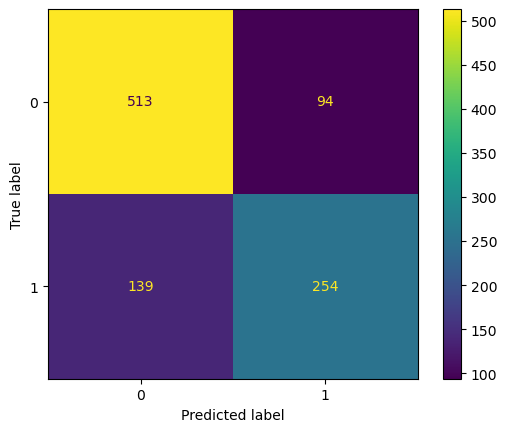

In [20]:
display_labels = ["0", "1"] # Customize your labels

cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=display_labels)
cm_display.plot()
plt.show()

## Hyperparameter tuning

- RandomizedSearchCV

In [21]:
# randomized searchcv
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV

In [22]:
# max_depth=None, min_samples_split=2,
# min_samples_leaf=1, min_weight_fraction_leaf=0.0,
# max_features=None, random_state=None,
# max_leaf_nodes=None, min_impurity_decrease=0.0,

In [23]:
param_grid = {
    'max_depth': [2,3,4,5,6],
    'min_samples_split': np.arange(50, 300, 25).tolist(),
    'min_samples_leaf': [10, 20, 50, 100],
    'class_weight': [None, "balanced"]
}

In [24]:
Kfold = KFold(n_splits = 5,shuffle=True,random_state=1)

In [25]:
model = DecisionTreeClassifier()
rscv = RandomizedSearchCV(model,param_grid,scoring='precision',refit=True,cv=Kfold,verbose=2,n_iter=20,n_jobs=-1)

In [26]:
rscv.fit(X,y)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


,estimator,DecisionTreeClassifier()
,param_distributions,"{'class_weight': [None, 'balanced'], 'max_depth': [2, 3, ...], 'min_samples_leaf': [10, 20, ...], 'min_samples_split': [50, 75, ...]}"
,n_iter,20
,scoring,'precision'
,n_jobs,-1
,refit,True
,cv,KFold(n_split... shuffle=True)
,verbose,2
,pre_dispatch,'2*n_jobs'
,random_state,None
,error_score,nan


In [27]:
rscv.best_score_

np.float64(0.7607333698030202)

In [28]:
rscv.best_params_

{'min_samples_split': 75,
 'min_samples_leaf': 50,
 'max_depth': 6,
 'class_weight': None}

In [29]:
# Grid Search

model = DecisionTreeClassifier()
gscv = GridSearchCV(model,param_grid,scoring='precision',refit=True,cv=Kfold,verbose=2,n_jobs=-1)

In [30]:
gscv.fit(X,y)

Fitting 5 folds for each of 400 candidates, totalling 2000 fits


,estimator,DecisionTreeClassifier()
,param_grid,"{'class_weight': [None, 'balanced'], 'max_depth': [2, 3, ...], 'min_samples_leaf': [10, 20, ...], 'min_samples_split': [50, 75, ...]}"
,scoring,'precision'
,n_jobs,-1
,refit,True
,cv,KFold(n_split... shuffle=True)
,verbose,2
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,criterion,'gini'


In [31]:
gscv.best_score_

np.float64(0.76707753279955)

In [32]:
gscv.best_params_

{'class_weight': None,
 'max_depth': 4,
 'min_samples_leaf': 100,
 'min_samples_split': 50}

In [33]:
# final model

model = DecisionTreeClassifier(max_depth= 4,
 min_samples_leaf = 100,
 min_samples_split= 50)

In [34]:
score = cross_val_score(model,X,y,cv=5,scoring='accuracy')
print("Accuracy Score : ",score.mean())

score = cross_val_score(model,X,y,cv=5,scoring='precision')
print("Precision Score : ",score.mean())

Accuracy Score :  0.8018000000000001
Precision Score :  0.7604991760493373


In [35]:
from sklearn.model_selection import cross_val_score

print("Recall:", cross_val_score(model, X, y, cv=5, scoring='recall').mean())
print("F1:", cross_val_score(model, X, y, cv=5, scoring='f1').mean())
print("ROC-AUC:", cross_val_score(model, X, y, cv=5, scoring='roc_auc').mean())

Recall: 0.7364999999999999
F1: 0.7481711101423608
ROC-AUC: 0.8715879166666667


In [36]:
model.fit(X_train,y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,4
,min_samples_split,50
,min_samples_leaf,100
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [37]:
y_pred = model.predict(X_test)

In [38]:
# classification report

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.83      0.82       607
           1       0.73      0.70      0.71       393

    accuracy                           0.78      1000
   macro avg       0.77      0.76      0.77      1000
weighted avg       0.78      0.78      0.78      1000



In [39]:
from sklearn.metrics import roc_curve,auc
y_prob = model.predict_proba(X_test)[:,1] #prob of positive class

fpr , tpr, thresholds = roc_curve(y_test,y_prob)



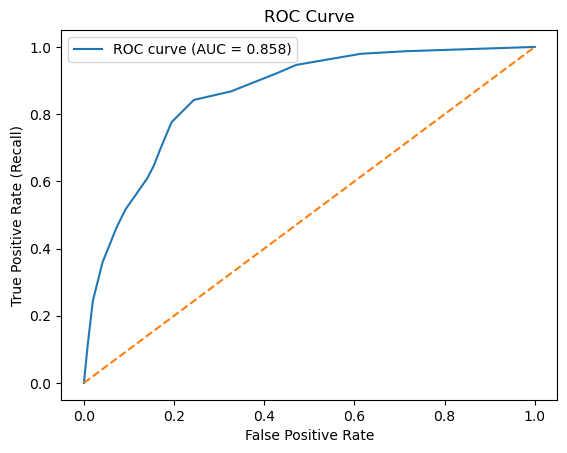

In [40]:
roc_auc = auc(fpr, tpr)

# Plot
plt.figure()
plt.plot(fpr, tpr, label=f"ROC curve (AUC = {roc_auc:.3f})")
plt.plot([0, 1], [0, 1], linestyle="--")  # random guess line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate (Recall)")
plt.title("ROC Curve")
plt.legend()
plt.show()

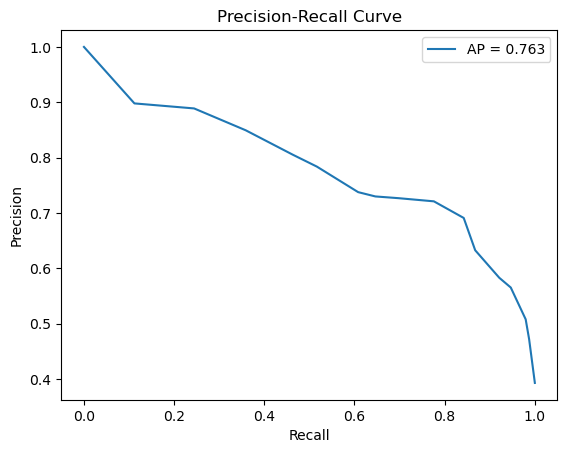

In [41]:
from sklearn.metrics import precision_recall_curve, average_precision_score

y_proba = model.predict_proba(X_test)[:, 1]

precision, recall, thresholds = precision_recall_curve(y_test, y_proba)
avg_precision = average_precision_score(y_test, y_proba)

plt.figure()
plt.plot(recall, precision, label=f"AP = {avg_precision:.3f}")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend()
plt.show()

In [42]:
y_prob = model.predict_proba(X_test)[:,1] #prob of positive class
y_pred_04 = (y_prob >= 0.4).astype(int)
y_pred_03 = (y_prob >= 0.3).astype(int)

In [43]:
y_test.shape

(1000,)

In [44]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, classification_report,roc_auc_score

print("=== Threshold 0.4 ===")
print("Precision:", precision_score(y_test, y_pred_04))
print("Recall:", recall_score(y_test, y_pred_04))
print("F1:", f1_score(y_test, y_pred_04))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_04))
print(classification_report(y_test, y_pred_04))

print("\n=== Threshold 0.3 ===")
print("Precision:", precision_score(y_test, y_pred_03))
print("Recall:", recall_score(y_test, y_pred_03))
print("F1:", f1_score(y_test, y_pred_03))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_03))
print(classification_report(y_test, y_pred_03))

=== Threshold 0.4 ===
Precision: 0.6910229645093946
Recall: 0.8422391857506362
F1: 0.7591743119266054
Confusion Matrix:
 [[459 148]
 [ 62 331]]
              precision    recall  f1-score   support

           0       0.88      0.76      0.81       607
           1       0.69      0.84      0.76       393

    accuracy                           0.79      1000
   macro avg       0.79      0.80      0.79      1000
weighted avg       0.81      0.79      0.79      1000


=== Threshold 0.3 ===
Precision: 0.6910229645093946
Recall: 0.8422391857506362
F1: 0.7591743119266054
Confusion Matrix:
 [[459 148]
 [ 62 331]]
              precision    recall  f1-score   support

           0       0.88      0.76      0.81       607
           1       0.69      0.84      0.76       393

    accuracy                           0.79      1000
   macro avg       0.79      0.80      0.79      1000
weighted avg       0.81      0.79      0.79      1000



In [45]:

thresholds = np.linspace(0.1, 0.9, 81)
best_t, best_f1 = 0, 0

for t in thresholds:
    y_pred_t = (y_proba >= t).astype(int)
    f1 = f1_score(y_test, y_pred_t)
    if f1 > best_f1:
        best_f1 = f1
        best_t = t

print("Best threshold:", best_t)
print("Best F1:", best_f1)

Best threshold: 0.30000000000000004
Best F1: 0.7591743119266054


# Final Model

In [46]:
final_model = DecisionTreeClassifier(max_depth= 4,
                                      min_samples_leaf = 100,
                                      min_samples_split= 50)

In [47]:
final_model.fit(X_train,y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,4
,min_samples_split,50
,min_samples_leaf,100
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [48]:
y_prob = final_model.predict_proba(X_test)[:,1]

In [49]:
threshold = 0.3 # chosen to maximize my F1 score
y_pred_final = (y_prob>=threshold).astype(int)

In [50]:
cm = confusion_matrix(y_test,y_pred_final)
print("Confusion Matrix : \n",cm)

Confusion Matrix : 
 [[459 148]
 [ 62 331]]


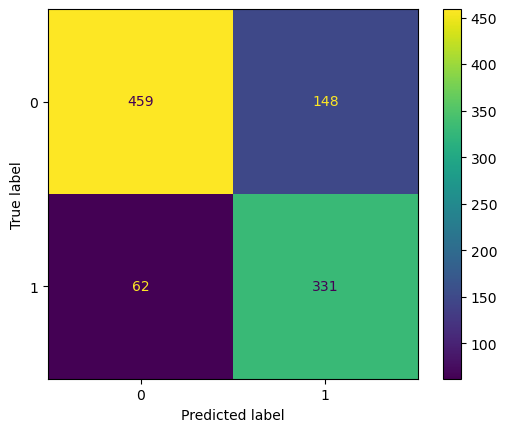

In [51]:
display_labels = ["0", "1"] # Customize your labels

cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=display_labels)
cm_display.plot()
plt.show()

In [52]:
print("Classification Report\n",classification_report(y_test,y_pred_final))

Classification Report
               precision    recall  f1-score   support

           0       0.88      0.76      0.81       607
           1       0.69      0.84      0.76       393

    accuracy                           0.79      1000
   macro avg       0.79      0.80      0.79      1000
weighted avg       0.81      0.79      0.79      1000



In [53]:
print("ROC-AUC:", roc_auc_score(y_test, y_proba))

ROC-AUC: 0.8577536878906398


In [54]:
cv_f1 = cross_val_score(final_model, X_train, y_train, cv=5, scoring="f1")
print("CV F1 mean:", cv_f1.mean())
print("CV F1 std:", cv_f1.std())

CV F1 mean: 0.7413215601792802
CV F1 std: 0.016800763525630837


# Applying bagging

In [55]:
from sklearn.ensemble import BaggingClassifier

In [56]:
bag = BaggingClassifier(
    estimator=None,
    n_estimators = 100,
    max_samples = 0.25,
    bootstrap = False,
    bootstrap_features = False,
    n_jobs = -1,
    verbose = 2
)

In [57]:
bag.fit(X_train,y_train)

[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   3 out of   8 | elapsed:    0.2s remaining:    0.5s
[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed:    0.3s finished


,estimator,None
,n_estimators,100
,max_samples,0.25
,max_features,1.0
,bootstrap,False
,bootstrap_features,False
,oob_score,False
,warm_start,False
,n_jobs,-1
,random_state,None
,verbose,2


In [58]:
y_pred_bag = bag.predict(X_test)

[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   3 out of   8 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed:    0.0s finished


In [59]:
print("Bagging F1 score : ",f1_score(y_pred=y_pred_bag,y_true=y_test))
print("Bagging Recall score : ",recall_score(y_pred=y_pred_bag,y_true=y_test))
print("Bagging precision score : ",precision_score(y_pred=y_pred_bag,y_true=y_test))

Bagging F1 score :  0.7150259067357513
Bagging Recall score :  0.7022900763358778
Bagging precision score :  0.7282321899736148


In [60]:
cv_f1 = cross_val_score(bag, X_train, y_train, cv=5, scoring="f1")
cv_recall = cross_val_score(bag, X_train, y_train, cv=5, scoring="recall")
cv_precision = cross_val_score(bag, X_train, y_train, cv=5, scoring="precision")

print("CV F1 mean:", cv_f1.mean())
print("CV recall mean:", cv_recall.mean())
print("CV precision mean:", cv_precision.mean())



[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   3 out of   8 | elapsed:    0.1s remaining:    0.2s
[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed:    0.1s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   3 out of   8 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   3 out of   8 | elapsed:    0.1s remaining:    0.2s
[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed:    0.1s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   3 out of   8 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Don

CV F1 mean: 0.7529164507553363
CV recall mean: 0.747338480292564
CV precision mean: 0.7621674794436577


[Parallel(n_jobs=8)]: Done   3 out of   8 | elapsed:    0.1s remaining:    0.2s
[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed:    0.1s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   3 out of   8 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed:    0.0s finished


In [61]:
print("CV F1 std:", cv_f1.std())
print("CV recall std:", cv_recall.std())
print("CV precision std:", cv_precision.std())

CV F1 std: 0.018114360704317736
CV recall std: 0.03181187970842542
CV precision std: 0.012189715736321554


In [62]:
cm = confusion_matrix(y_test,y_pred_bag)
print("Confusion Matrix : \n",cm)

Confusion Matrix : 
 [[504 103]
 [117 276]]


In [63]:
print("Classification Report\n",classification_report(y_test,y_pred_bag))

Classification Report
               precision    recall  f1-score   support

           0       0.81      0.83      0.82       607
           1       0.73      0.70      0.72       393

    accuracy                           0.78      1000
   macro avg       0.77      0.77      0.77      1000
weighted avg       0.78      0.78      0.78      1000



In [64]:
y_prob = bag.predict_proba(X_test)[:,1]

[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   3 out of   8 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed:    0.0s finished


In [65]:
threshold = 0.3 # chosen to maximize my F1 score
y_pred_final = (y_prob>=threshold).astype(int)

In [66]:
print("ROC-AUC:", roc_auc_score(y_test, y_prob))

ROC-AUC: 0.8504680340891466


# Random forest


In [67]:
# base model
from sklearn.ensemble import RandomForestClassifier

In [68]:
rfc = RandomForestClassifier(n_jobs = -1)

In [69]:
rfc.fit(X_train,y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [70]:
y_pred_rfc_base = rfc.predict(X_test)

In [71]:
print("Precision :",(cross_val_score(rfc,X_train,y_train,scoring='precision',cv=5)).mean())
print("Recall :",(cross_val_score(rfc,X_train,y_train,scoring='recall',cv=5)).mean())
print("F1 :",(cross_val_score(rfc,X_train,y_train,scoring='f1',cv=5)).mean())

print('confusion matrix random forest \n',confusion_matrix(y_test,y_pred_rfc_base))

print('Classification Report  \n',classification_report(y_test,y_pred_rfc_base))

y_prob = rfc.predict_proba(X_test)[:,1]
print("ROC-AUC:", roc_auc_score(y_test, y_prob))

Precision : 0.7633772384254919
Recall : 0.7361351367040111
F1 : 0.7520304497664704
confusion matrix random forest 
 [[507 100]
 [117 276]]
Classification Report  
               precision    recall  f1-score   support

           0       0.81      0.84      0.82       607
           1       0.73      0.70      0.72       393

    accuracy                           0.78      1000
   macro avg       0.77      0.77      0.77      1000
weighted avg       0.78      0.78      0.78      1000

ROC-AUC: 0.8475923387451739


### Randomized SearchCV

In [72]:
param_grid = {
    'n_estimators':[100,150,200,250,300,500],
    'bootstrap':[True,False],
    'max_depth':[2,3,5,6,7],
    'min_samples_split':[10,20,30,50,60,80,100],
    'max_features':['sqrt', 'log2', None]
}

In [73]:
model = RandomForestClassifier(warm_start = True, n_jobs=-1)

In [76]:
rscv = RandomizedSearchCV(model,param_grid,n_iter = 50,scoring='f1',cv=Kfold,refit=True,verbose=2,n_jobs = -1)

In [90]:
rscv.fit(X_train,y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


,estimator,RandomForestC...rm_start=True)
,param_distributions,"{'bootstrap': [True, False], 'max_depth': [2, 3, ...], 'max_features': ['sqrt', 'log2', ...], 'min_samples_split': [10, 20, ...], ...}"
,n_iter,50
,scoring,'f1'
,n_jobs,-1
,refit,True
,cv,KFold(n_split... shuffle=True)
,verbose,2
,pre_dispatch,'2*n_jobs'
,random_state,None
,error_score,nan


In [91]:
rscv.best_params_

{'n_estimators': 100,
 'min_samples_split': 80,
 'max_features': 'sqrt',
 'max_depth': 6,
 'bootstrap': True}

In [92]:
rscv.best_score_

np.float64(0.7586790180308703)

In [106]:
rscv.best_params_

{'n_estimators': 100,
 'min_samples_split': 80,
 'max_features': 'sqrt',
 'max_depth': 6,
 'bootstrap': True}

In [102]:
final_model_rscv = rscv.best_estimator_

In [103]:
y_pred = final_model_rscv.predict(X_test)

In [107]:
f1_score(y_test,y_pred)

0.7195902688860435

In [122]:
print("Precision :",(cross_val_score(final_model_rscv,X_train,y_train,scoring='precision',cv=5)).mean())
print("Recall :",(cross_val_score(final_model_rscv,X_train,y_train,scoring='recall',cv=5)).mean())
print("F1 :",(cross_val_score(final_model_rscv,X_train,y_train,scoring='f1',cv=5)).mean())

print('confusion matrix random forest \n',confusion_matrix(y_test,y_pred))

print('Classification Report  \n',classification_report(y_test,y_pred))

y_prob = final_model_rscv.predict_proba(X_test)[:,1]
print("ROC-AUC:", roc_auc_score(y_test, y_prob))

Precision : 0.7641582716209046
Recall : 0.7516940461678373
F1 : 0.7581944899654394
confusion matrix random forest 
 [[500 107]
 [112 281]]
Classification Report  
               precision    recall  f1-score   support

           0       0.82      0.82      0.82       607
           1       0.72      0.72      0.72       393

    accuracy                           0.78      1000
   macro avg       0.77      0.77      0.77      1000
weighted avg       0.78      0.78      0.78      1000

ROC-AUC: 0.8599586671194


In [110]:
thresholds = np.linspace(0.1,0.9,81)
best_t , best_f1 = 0,0

for t in thresholds:
    y_pred_t = (y_prob >=t).astype(int)
    f1 = f1_score(y_test,y_pred_t)
    if f1> best_f1:
        best_t = t
        best_f1 = f1


print('Best threshold : ',best_t)
print("Best f1 : ",best_f1)

Best threshold :  0.37
Best f1 :  0.7597633136094675


In [126]:
best_threshold = 0.37

y_pred_final = (y_prob >= best_threshold).astype(int)


print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_final))
print("\nClassification Report:\n", classification_report(y_test, y_pred_final))
print("ROC-AUC:", roc_auc_score(y_test, y_prob))

Confusion Matrix:
 [[476 131]
 [ 72 321]]

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.78      0.82       607
           1       0.71      0.82      0.76       393

    accuracy                           0.80      1000
   macro avg       0.79      0.80      0.79      1000
weighted avg       0.81      0.80      0.80      1000

ROC-AUC: 0.8599586671194


In [131]:
cv_f1 = cross_val_score(final_model_rscv, X_train, y_train, cv=5 ,scoring="f1")
print("CV F1 mean:", cv_f1.mean())
print("CV F1 std:", cv_f1.std())

CV F1 mean: 0.7588765706910402
CV F1 std: 0.018169520329672013


### Grid Search CV

In [137]:
param_grid = {
    'n_estimators':[100,150,200,220,250],
    'max_depth':[4,5,6,7],
    'min_samples_split':[60,70,75,80,100],
}

In [138]:
gscv = GridSearchCV(model,param_grid,scoring='f1',n_jobs=-1,cv=Kfold,verbose=2,refit=True)

In [139]:
gscv.fit(X_train,y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


,estimator,RandomForestC...rm_start=True)
,param_grid,"{'max_depth': [4, 5, ...], 'min_samples_split': [60, 70, ...], 'n_estimators': [100, 150, ...]}"
,scoring,'f1'
,n_jobs,-1
,refit,True
,cv,KFold(n_split... shuffle=True)
,verbose,2
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_estimators,100


In [140]:
gscv.best_params_

{'max_depth': 7, 'min_samples_split': 70, 'n_estimators': 100}

In [141]:
gscv.best_score_

np.float64(0.7603550279626504)

In [142]:
final_model_gscv = gscv.best_estimator_

In [144]:
y_pred = final_model_gscv.predict(X_test)

In [145]:
f1_score(y_test,y_pred)

0.7197943444730077

In [143]:
y_prob = final_model_gscv.predict_proba(X_test)[:,1]

In [146]:
print("Precision :",(cross_val_score(final_model_gscv,X_train,y_train,scoring='precision',cv=5)).mean())
print("Recall :",(cross_val_score(final_model_gscv,X_train,y_train,scoring='recall',cv=5)).mean())
print("F1 :",(cross_val_score(final_model_gscv,X_train,y_train,scoring='f1',cv=5)).mean())

print('confusion matrix random forest \n',confusion_matrix(y_test,y_pred))

print('Classification Report  \n',classification_report(y_test,y_pred))

print("ROC-AUC:", roc_auc_score(y_test, y_prob))

Precision : 0.7635475358865641
Recall : 0.7460923743735608
F1 : 0.7578397177968274
confusion matrix random forest 
 [[502 105]
 [113 280]]
Classification Report  
               precision    recall  f1-score   support

           0       0.82      0.83      0.82       607
           1       0.73      0.71      0.72       393

    accuracy                           0.78      1000
   macro avg       0.77      0.77      0.77      1000
weighted avg       0.78      0.78      0.78      1000

ROC-AUC: 0.8586423867432961


In [147]:
thresholds = np.linspace(0.1,0.9,81)
best_t , best_f1 = 0,0

for t in thresholds:
    y_pred_t = (y_prob >=t).astype(int)
    f1 = f1_score(y_test,y_pred_t)
    if f1> best_f1:
        best_t = t
        best_f1 = f1


print('Best threshold : ',best_t)
print("Best f1 : ",best_f1)

Best threshold :  0.35
Best f1 :  0.7593457943925234


In [148]:
best_threshold = 0.37

y_pred_final = (y_prob >= best_threshold).astype(int)


print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_final))
print("\nClassification Report:\n", classification_report(y_test, y_pred_final))
print("ROC-AUC:", roc_auc_score(y_test, y_prob))

Confusion Matrix:
 [[478 129]
 [ 76 317]]

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.79      0.82       607
           1       0.71      0.81      0.76       393

    accuracy                           0.80      1000
   macro avg       0.79      0.80      0.79      1000
weighted avg       0.80      0.80      0.80      1000

ROC-AUC: 0.8586423867432961
